# Neural Networks

Neural nets are a specific method for learning from data, a method that is based on a very simple element, the *neuron unit*. A neuron unit (or 1-layer neural network) is a mathematical function of this kind:

${\mathbf y} = \sigma(\mathbf{w}^T \cdot {\mathbf x} + b)$

where ${\mathbf x}$ represents an input element in vector form, $\mathbf{w}$ is a vector of weights,  $\sigma$ is a non-linear function and $b$ a scalar value. $(\mathbf{w},b)$ are called the parameters of the function. The output of this function is called the *activation* of the neuron. 

Regarding the non-linear function, historically the most common one was the Sigmoid function, but nowadays there are several alternatives that are supposed to be better suited to learning from data, such as ReLU and variants.

> **Q:** What kind of decision functions are represented by a 1-layer nn?

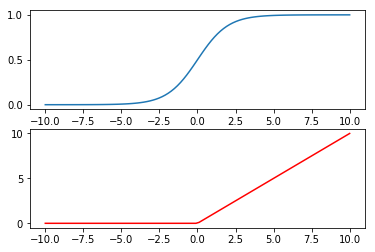

In [1]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return x * (x > 0)

plt.ylim(-1.5, 10)
x = np.linspace(-10.0,10.0,100)
y1 = sigmoid(x)
plt.subplot(2, 1, 1)
plt.plot(x,y1)
y2 = ReLU(x)
plt.subplot(2, 1, 2)
plt.plot(x,y2,'r')

In [2]:
x = np.array([0.4,1.2,3.5])

w = np.array([1.0,2.0,1.0])
b = 1.3

y = sigmoid(np.dot(x,w) + b)

print(y)

0.9994997988929205


## Multilayer neural networks

Simple neurons can be organized in larger structures by applying to the same data vector different sets of weights, forming what is called a *layer*, and by stacking layers one on top of the output of the other.  

It is important to notice that a multilayer neural network can be seen as a composition of matrix products (matrices represent weights) and non-linear function activations. For the case of a 2-layer network the outcome is:

$ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$

where ${\mathbf \sigma}$ represents a vectorial version of the sigmoid function and $W^i$ are the weights of each layer in matrix form.  

What is interesting about this kind of structures is that it has been showed that even a neural network with a single hidden layer containing a finite number of neurons can approximate any continuous function of $\mathbf{R}^n$. This fact makes neural networks a sound candidate to implement learning from data methods. The question is then: how to find the optimal parameters, ${\mathbf w} = (W^i,{\mathbf b})$, to approximate a function that is implicitly defined by a set of samples $\{({\mathbf x}_1, {\mathbf y}_1), \dots,  ({\mathbf x}_n, {\mathbf y}_n)\}$?

From a technical point of view, not only neural networks but most of the algorithms that have been proposed to infer models from large data sets are based on the iterative solution of a mathematical problem that involves data and a mathematical model. If there was an analytic solution to the problem, this should be the adopted one, but this is not the case for most of the cases. The techniques that have been designed to tackle these problems are grouped under a field that is called optimization. The most important technique for solving optimization problems is *gradient descend*.

> The training of models like $ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$ (or bigger!) can be readily performed by applying *automatic differentiation* to a loss function. 

> In the case of regression: $L = \frac{1}{n} \sum_{i=1}^n \Big({\mathbf y}_i - {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x}_i + {\mathbf b}^0 \Big) + {\mathbf b}^1 )\Big)\Big)^2 $

> In the case of two-class classification: $L = \frac{1}{n} log(1 + exp(-y_i {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big))) $


## Playing with neural nets.
+ Concentric classes, 1 layer, Sigmoid.
+ Concentric classes, 1 layer, ReLu.
+ X-or, 0 layer.
+ X-or, 1 layer.
+ Spiral data.
+ Regression.


http://playground.tensorflow.org

# Deep Learning in `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top TensorFlow. It was developed with a focus on enabling fast experimentation.

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

```Python
from keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as ``.add()``:

```Python
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
```

Once your model looks good, configure its learning process with ``.compile()``:

```Python
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
```

If you need to, you can further configure your optimizer.

```Python
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```Python
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
```

Evaluate your performance in one line:
```Python
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
```

Or generate predictions on new data:

```Python
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
```

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4033626981049709055, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6260323641622972063
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5171876941613213224
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12792273479971568433
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [6]:

'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1113 15:24:32.411875 140014066894720 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [===

### Dropout

Dropout is a way to regularize the neural network. During training, it may happen that neurons of a particular layer may always become influenced only by the output of a particular neuron in the previous layer. In that case, the neural network would overfit.

Dropout prevents overfitting and regularizes by randomly cutting the connections (also known as dropping the connection) between neurons in successuve layers during training.

### Keras optimizers

There are several variants of gradient descent, which differ in how we compute the step.

Keras supports seven optimizers.

```python
my_opt = K.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
my_opt = K.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_opt = K.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
my_opt = K.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
```

#### Momentum

For example, SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

**Momentum** is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector:

$$ v_t = m v_{t-1} + \alpha \nabla_w f $$$$ w = w - v_t    $$

The momentum $m$ is commonly set to $0.9$.

#### Adagrad

SGD manipulates the learning rate globally and equally for all parameters. Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter.

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

$$ c = c + (\nabla_w f)^2 $$$$ w = w - \frac{\alpha}{\sqrt{c}} $$

## CNN

The previously mentioned multilayer perceptrons represent the most general and powerful feedforward neural network model possible; they are organised in layers, such that every neuron within a layer receives its own copy of all the outputs of the previous layer as its input. This kind of model is perfect for the right kind of problem – learning from a fixed number of (more or less) unstructured parameters.

> However, consider what happens to the number of parameters (weights) of such a model when being fed raw image data (f.e. a $200 \times 200$ pixel image connected to 1024 neurons).

In [0]:
200 * 200 * 1024

40960000

The situation quickly becomes unmanageable as image sizes grow larger, way before reaching the kind of images people usually want to work with in real applications.

A common solution is to downsample the images to a size where MLPs can safely be applied. However, if we directly downsample the image, we potentially lose a wealth of information; it would be great if we would somehow be able to still do some useful (without causing an explosion in parameter count) processing of the image, prior to performing the downsampling.

It turns out that there is a very efficient way of pulling this off, and it makes advantage of the structure of the information encoded within an image – it is assumed that pixels that are spatially closer together will "cooperate" on forming a particular feature of interest much more than ones on opposite corners of the image. Also, if a particular (smaller) feature is found to be of great importance when defining an image's label, it will be equally important if this feature was found anywhere within the image, regardless of location.

Enter the convolution operator. Given a two-dimensional image, $I$, and a small matrix, $K$ of size $h \times w$, (known as a convolution kernel), which we assume encodes a way of extracting an interesting image feature, we compute the convolved image, $I∗K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of elementwise products between the image and the kernel:

$$
output(x,y) = (I \otimes K)(x,y) = \sum_{m=0}^{M-1} \sum_{n=1}^{N-1} K(m,n) I(x-n, y-m)
$$

The convolution operator forms the fundamental basis of the convolutional layer of a CNN. The layer is completely specified by a certain number of kernels, $K$, and it operates by computing the convolution of the output images of a previous layer with each of those kernels, afterwards adding the biases (one per each output image). Finally, an activation function, $\sigma$, may be applied to all of the pixels of the output images. 

Typically, the input to a convolutional layer will have $d$ channels (e.g., red/green/blue in the input layer), in which case the kernels are extended to have this number of channels as well.

Note that, since all we're doing here is addition and scaling of the input pixels, the kernels may be learned from a given training dataset via gradient descent, exactly as the weights of an MLP. In fact, an MLP is perfectly capable of replicating a convolutional layer, but it would require a lot more training time (and data) to learn to approximate that mode of operation.

## Pooling

In fact, after a convolutional layer there are two kinds of non linear functions that are usually applied: non-linear activation functions such as sigmoids or ReLU and *pooling*. Pooling layers are used with the purpose to progressively reduce the spatial size of the image to achieve scale invariance. The most common layer is the *maxpool* layer. Basically a maxpool of $2 \times 2$ causes a filter of 2 by 2 to traverse over the entire input array and pick the largest element from the window to be included in the next representation map. Pooling can also be implemented by using other criteria, such as averaging instead of taking the max element. 

In [11]:
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import numpy as np

batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_train, height, width, depth = X_train.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range

Y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(X_train, Y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

170508288/170498071 [==============================] - 11s 0us/step
Train on 45000 samples, validate on 5000 samples
Epoch 1/200
45000/45000 [==============================] - 20s 441us/sample - loss: 1.4983 - acc: 0.4554 - val_loss: 1.1253 - val_acc: 0.6026
Epoch 2/200
45000/45000 [==============================] - 17s 368us/sample - loss: 1.1149 - acc: 0.6023 - val_loss: 0.9383 - val_acc: 0.6692
Epoch 3/200
45000/45000 [==============================] - 16s 364us/sample - loss: 0.9648 - acc: 0.6603 - val_loss: 0.8321 - val_acc: 0.7110
Epoch 4/200
45000/45000 [==============================] - 16s 364us/sample - loss: 0.8727 - acc: 0.6932 - val_loss: 0.8033 - val_acc: 0.7284
Epoch 5/200
45000/45000 [==============================] - 16s 365us/sample - loss: 0.8035 - acc: 0.7185 - val_loss: 0.7413 - val_acc: 0.7498
Epoch 6/200
45000/45000 [==============================] - 16s 363us/sample - loss: 0.7451 - acc: 0.7382 - val_loss: 0.7679 - val_acc: 0.7374
Epoch 7/200
45000/45000 [======

KeyboardInterrupt: ignored

## Recurrent Neural Networks


Classical neural networks, including convolutional ones, suffer from two severe limitations:

+ They only accept a fixed-sized vector as input and produce a fixed-sized vector as output.
+ They do not consider the sequential nature of some data (language, video frames, time series, etc.) 

Recurrent neural networks (RNN) overcome these limitations by allowing to operate over sequences of vectors (in the input, in the output, or both). RNNs are called recurrent because they perform the same task for every element of the sequence, with the output depending on the previous computations. The basic formulas of a simple RNN are:

$$ s_t = f_1 (Ux_t + W s_{t-1}) $$
$$ y_t = f_2 (V s_t) $$

These equations basically say that the current network state, commonly known as hidden state, $s_t$ is a function $f_1$ of the previous hidden state $s_{t-1}$ and the current input $x_t$. $U, V, W$ matrices are the parameters of the function. 

Given an input sequence, we apply RNN formulas in a recurrent way until we process all input elements. The RNN shares the parameters  $U,V,W$ across all recurrent steps. We can think of the hidden state  as a memory of the network that captures information about the previous steps.

The novelty of this type of network is that we we have encoded in the very architecture of the network a sequence modeling scheme that has been in used in the past to predict time series as well as to model language. In contrast to the precedent architectures we have introduced, now the hidden layers are indexed by both 'spatial' and 'temporal' index. 

The inputs of a recurrent network are always vectors, but we can process sequences of symbols/words by representing these symbols by numerical vectors.

Let's suppose we want to classify a phrase or a series of words. Let $x^1, ...,x^{C}$ the word vectors corresponding to a corpus with $C$ symbols. Then, the relationship to compute the hidden layer output features at each time-step $t$ is $h_t = \sigma(W s_{t-1} + U x_{t})$, where:

+ $x_{t} \in \mathbf{R}^{d}$ is input word vector at time $t$. 
+ $U \in \mathbf{R}^{D_h \times d}$ is the weights matrix of the input word vector, $x_t$.
+ $W \in \mathbf{R}^{D_h \times D_h}$ is the weights matrix of the output of the previous time-step, $t-1$.
+ $s_{t-1}  \in \mathbf{R}^{D_h}$ is the output of the non-linear function at the previous time-step, $t-1$. 
+ $\sigma ()$ is the non-linearity function (normally, ``tanh``).


The output of this network is $\hat{y}_t = softmax (V h_t)$, that represents the output probability distribution over the vocabulary at each time-step $t$.  

Essentially, $\hat{y}_t$ is the next predicted word given the document context score so far (i.e. $h_{t-1}$) and the last observed word vector $x^{(t)}$. 

The loss function used in RNNs is often the cross entropy error:

$
	L^{(t)}(W) = - \sum_{j=1}^{|V|} y_{t,j} \times log (\hat{y}_{t,j})
$

The cross entropy error over a corpus of size $C$ is:

$
	L = \frac{1}{C} \sum_{c=1}^{C} L^{(c)}(W) = - \frac{1}{C} \sum_{c=1}^{C} \sum_{j=1}^{|V|} y_{c,j} \times log (\hat{y}_{c,j})
$

These simple RNN architectures have been shown to be too prone to forget information when sequences are long and they are also very unstable when trained. For this reason several alternative architectures have been proposed. These alternatives are based on the presence of *gated units*. Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation. The two most important alternative RNN are Long Short Term Memories (LSTM) and Gated Recurrent Units (GRU) networks. 

In [0]:
'''Example script to generate text from Nietzsche's writings.
At least 20 epochs are required before the generated text
starts sounding coherent.
It is recommended to run this script on GPU, as recurrent
networks are quite computationally intensive.
If you try this script on new data, make sure your corpus
has at least ~100k characters. ~1M is better.
'''

from __future__ import print_function
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file
import numpy as np
import random
import sys
import io

path = get_file('nietzsche.txt', origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

614400/600901 [==============================] - 1s 1us/step
corpus length: 600893
total chars: 57
nb sequences: 200285
Vectorization...
Build model...


W1113 15:37:38.660059 140014066894720 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 200285 samples
Epoch 1/60
200192/200285 [============================>.] - ETA: 0s - loss: 1.9756
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "d
evinces courage, directness, endurance"
d
evinces courage, directness, endurance of the fact the present and the prosent of the pearations and the prospect of the pear to the pearations of the possess of the possess of the possess the presenting and for the possical to a strength the present and the believe and the prostitions and the possess the possitions and the possical compleation of the present and farse of the pease of the possess and the perhaps the pease of the prese
----- diversity: 0.5
----- Generating with seed: "d
evinces courage, directness, endurance"
d
evinces courage, directness, endurance the seemen as even the revence the peans the end man, and the man, been with standing the plant to complies and the purposent and precent of care of the pore of decending the present of the 